In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

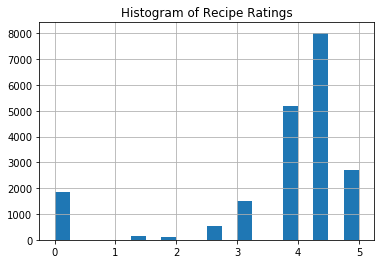

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
svr.score(X, Y)

-0.003978314483867873

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

In [10]:
df = raw_data

In [11]:
list(df.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

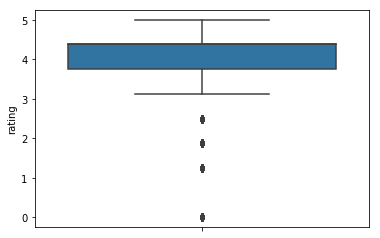

In [13]:
# Looks like anything above 4 would be an above average recipe so lets classify anything better than 4 as good
sns.boxplot(x=df['rating'], orient = 'v')
plt.axvline(4,c='r')

Try to transform rating to bool type variable.

In [20]:
# Define Outcome Variable
df['good_recipe?'] = df['rating'] > 4

# Drop columns relating to nutrition data and other indicators 
data = df.drop(labels=['title','calories','protein','fat','sodium','rating'],axis=1)
data = data[data['good_recipe?']==True]

data

,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,good_recipe?
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True


In [19]:
# Determine most used identifiers in 'good' recipes and list only top 50
top = data.sum().sort_values(ascending=False)
top = top.drop(labels='good_recipe?',axis=0)
top_30 = top.head(n=30)
keywords = list(top_30.index)
top_30

bon appétit          5494.0
peanut free          4818.0
soy free             4654.0
tree nut free        4001.0
vegetarian           3635.0
kosher               3429.0
gourmet              3409.0
pescatarian          3372.0
quick & easy         2738.0
wheat/gluten-free    2692.0
bake                 2493.0
summer               2288.0
dessert              2052.0
fall                 1781.0
no sugar added       1715.0
dairy free           1704.0
winter               1701.0
dinner               1661.0
side                 1622.0
sugar conscious      1375.0
kidney friendly      1306.0
healthy              1294.0
onion                1238.0
tomato               1185.0
fruit                1136.0
milk/cream           1114.0
sauté                1082.0
vegetable            1031.0
thanksgiving          955.0
kid-friendly          955.0
dtype: float64

In [26]:
top = data.sum().sort_values(ascending=False)
top = top.drop(labels='good_recipe?',axis=0)
top_30 = top.head(n=30)
keywords = list(top_30.index)
top_30

bon appétit          5494.0
peanut free          4818.0
soy free             4654.0
tree nut free        4001.0
vegetarian           3635.0
kosher               3429.0
gourmet              3409.0
pescatarian          3372.0
quick & easy         2738.0
wheat/gluten-free    2692.0
bake                 2493.0
summer               2288.0
dessert              2052.0
fall                 1781.0
no sugar added       1715.0
dairy free           1704.0
winter               1701.0
dinner               1661.0
side                 1622.0
sugar conscious      1375.0
kidney friendly      1306.0
healthy              1294.0
onion                1238.0
tomato               1185.0
fruit                1136.0
milk/cream           1114.0
sauté                1082.0
vegetable            1031.0
thanksgiving          955.0
kid-friendly          955.0
dtype: float64

We choose top 30 variables that frequently marked on good recipes.

In [28]:
# Collect Variables for model
feature_df = df[keywords]
feature_df['rating'] = df['rating']
feature_df['good_recipe?']= df['good_recipe?']
X = feature_df.drop(labels=['rating','good_recipe?'],axis=1)
Y = feature_df['good_recipe?']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [29]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X,Y)
svc.score(X,Y)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5797426690604428

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X, Y, cv=5)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

array([0.56793817, 0.57043131, 0.56644228, 0.57830424, 0.56597655])

The scores are improved, however it is sill not good. (accuracy: 57 %) 

In [42]:
# Drop NA values from datafrome
data = df.dropna()
X = data.drop(labels=['rating','title'],axis=1)

In [44]:
feature_df

,bon appétit,peanut free,soy free,tree nut free,vegetarian,kosher,gourmet,pescatarian,quick & easy,wheat/gluten-free,...,onion,tomato,fruit,milk/cream,sauté,vegetable,thanksgiving,kid-friendly,rating,good_recipe?
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.500,False
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.375,True
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.750,False
3,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.000,True
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.125,False
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.375,True
6,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.375,True
7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.750,False
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.375,True
9,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.750,False


In [91]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(feature_df[feature_df.columns[:-1]])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
X1.T

array([[-0.0164649 , -0.01652882, -0.01719023, ..., -0.01608418,
        -0.0158952 , -0.01609251],
       [-0.01829777, -0.02142005, -0.02454234, ..., -0.01803758,
        -0.01439492, -0.00710959],
       [-0.01661822, -0.01583615, -0.01661822, ..., -0.01510297,
        -0.01578727, -0.01647158],
       ...,
       [-0.02863804, -0.02863804, -0.02863804, ..., -0.02863804,
        -0.02863804, -0.02863804],
       [ 6.7877967 , -0.14732321, -0.14732321, ...,  6.7877967 ,
        -0.14732321, -0.14732321],
       [-1.09612898,  0.91230139, -1.09612898, ...,  0.91230139,
         0.91230139,  0.91230139]])

In [92]:
scaled_data = scaler.transform(feature_df[feature_df.columns[:-1]])

In [93]:
scaled_data

array([[-0.93517071, -0.84819257, -0.82220927, ..., -0.28002213,
         3.19311445, -0.90578138],
       [ 1.06932348, -0.84819257, -0.82220927, ..., -0.28002213,
        -0.31317387,  0.49264242],
       [-0.93517071, -0.84819257, -0.82220927, ..., -0.28002213,
        -0.31317387,  0.02650115],
       ...,
       [-0.93517071,  1.17897756,  1.21623537, ..., -0.28002213,
         3.19311445,  0.49264242],
       [ 1.06932348, -0.84819257, -0.82220927, ..., -0.28002213,
        -0.31317387,  0.49264242],
       [ 1.06932348, -0.84819257, -0.82220927, ..., -0.28002213,
        -0.31317387,  0.49264242]])

In [110]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [111]:
x_pca = pca.transform(scaled_data)

In [112]:
x_pca

array([[-2.02374161,  0.00936647, -0.20178271, ...,  2.57603374,
         0.87431482,  0.24322104],
       [-2.15949231,  0.39886093,  1.63294435, ...,  0.72861851,
         1.33947094,  0.71859361],
       [-2.22983211, -0.51323014, -1.38716167, ...,  0.14931904,
         0.76449819,  0.15894341],
       ...,
       [ 1.70164295, -2.09135138,  0.23781779, ...,  2.44875348,
         0.49894217, -2.27524105],
       [-2.0971329 , -0.28711882,  0.81278732, ..., -2.32010051,
        -2.41234126, -0.33676721],
       [-2.09584419,  0.8493799 ,  1.48965726, ...,  0.39239616,
         0.37457643,  0.88680367]])

In [113]:
scaled_data.shape

(20052, 31)

In [114]:
x_pca.shape

(20052, 10)

Text(0, 0.5, 'Second Principal Component')

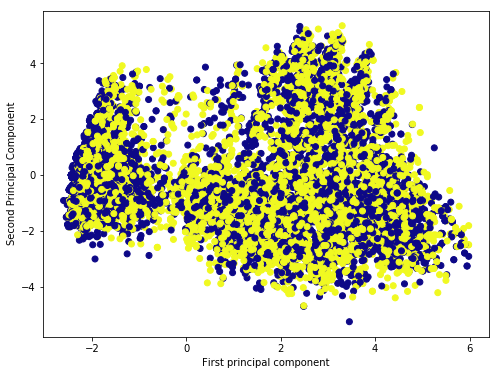

In [115]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=feature_df['good_recipe?'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [116]:
pca.components_

array([[ 2.84895989e-02,  3.71346973e-01,  3.67180632e-01,
         3.33295682e-01,  2.62153040e-01,  3.41548922e-01,
        -2.74266148e-02,  3.41208421e-01,  1.90581476e-02,
         2.76952088e-01,  4.06588093e-02,  1.37719545e-03,
         1.02578290e-01,  2.09514986e-02,  2.29356405e-01,
         2.18951168e-01, -6.59338594e-03,  9.38989761e-02,
         1.81221775e-01,  1.82517881e-01,  1.85947021e-01,
         6.16747562e-02, -2.00418860e-02, -3.09106872e-02,
         3.72175364e-02,  2.95846172e-02, -2.01694685e-02,
         2.42049066e-02,  3.25936435e-02,  4.52156723e-02,
         3.85901609e-02],
       [ 2.79575446e-02, -1.89176070e-04,  2.01615485e-02,
        -9.23620761e-02,  1.89846027e-01,  1.38915537e-01,
         1.20601115e-03,  1.49669425e-01, -1.53929127e-01,
        -1.47838170e-01,  3.34617748e-01, -4.02745059e-03,
         4.68373361e-01,  5.58853508e-02, -2.85602226e-01,
        -2.17102664e-01,  2.98867331e-02, -2.48949975e-01,
        -1.76567396e-01, -2.20

In [117]:
df_comp = pd.DataFrame(pca.components_,columns=list(feature_df.columns)[:-1])

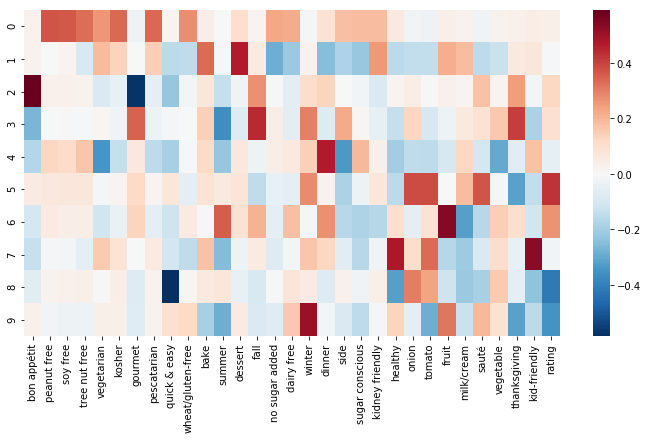

In [118]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='RdBu_r',)

In [119]:
df_comp

,bon appétit,peanut free,soy free,tree nut free,vegetarian,kosher,gourmet,pescatarian,quick & easy,wheat/gluten-free,...,healthy,onion,tomato,fruit,milk/cream,sauté,vegetable,thanksgiving,kid-friendly,rating
0,0.028490,0.371347,0.367181,0.333296,0.262153,0.341549,-0.027427,0.341208,0.019058,0.276952,...,0.061675,-0.020042,-0.030911,0.037218,0.029585,-0.020169,0.024205,0.032594,0.045216,0.038590
1,0.027958,-0.000189,0.020162,-0.092362,0.189846,0.138916,0.001206,0.149669,-0.153929,-0.147838,...,-0.154224,-0.141862,-0.143217,0.218016,0.183922,-0.152218,-0.128432,0.058462,0.071563,-0.003880
2,0.590746,0.031466,0.031802,0.023776,-0.081154,-0.046864,-0.575900,-0.052483,-0.226790,-0.013827,...,0.018092,0.045119,0.003145,0.034780,0.020880,0.176427,0.020836,0.249632,-0.013610,0.126121
3,-0.264745,-0.000729,0.004406,-0.006246,0.012288,-0.023903,0.349501,-0.026515,-0.007102,-0.000199,...,-0.139369,0.128293,-0.093848,-0.025729,0.060254,0.091339,0.159221,0.410583,-0.183542,0.094715
4,-0.170833,0.130894,0.113921,0.167755,-0.343975,-0.136594,0.062786,-0.149085,-0.192772,-0.003979,...,-0.203137,-0.145449,-0.150299,-0.096858,0.123616,-0.101403,-0.296888,-0.063013,0.174480,-0.051789
5,0.051119,0.066286,0.071219,0.070225,-0.009070,0.018215,0.119538,0.020630,0.072073,-0.053420,...,-0.156598,0.386457,0.384411,-0.001382,0.183053,0.372309,-0.007593,-0.316856,-0.143915,0.426783
6,-0.102438,0.053492,0.041507,0.042535,-0.110875,-0.036165,0.134401,-0.055080,-0.118401,0.055735,...,0.099362,-0.052434,0.090432,0.542184,-0.320278,-0.160676,0.148723,0.102051,-0.109370,0.267204
7,-0.134258,-0.008772,-0.012034,-0.056267,0.158925,0.083918,-0.001037,0.057695,-0.103765,-0.145523,...,0.479881,0.105872,0.334847,-0.164589,-0.208957,-0.082822,0.111047,-0.043245,0.534971,-0.020100
8,-0.063465,0.023907,0.031082,0.036201,0.003606,0.043115,-0.071055,0.029906,-0.585120,0.016519,...,-0.321427,0.303832,0.241016,-0.117028,-0.213662,-0.193483,0.157406,-0.055181,-0.232635,-0.416427
9,0.034358,-0.020018,-0.027026,-0.033210,0.038770,0.036922,-0.070028,0.025264,0.094953,0.120495,...,0.133884,-0.052967,-0.285883,0.318491,-0.127158,0.194848,0.086214,-0.316529,-0.153384,-0.349989


In [120]:
x_pca

array([[-2.02374161,  0.00936647, -0.20178271, ...,  2.57603374,
         0.87431482,  0.24322104],
       [-2.15949231,  0.39886093,  1.63294435, ...,  0.72861851,
         1.33947094,  0.71859361],
       [-2.22983211, -0.51323014, -1.38716167, ...,  0.14931904,
         0.76449819,  0.15894341],
       ...,
       [ 1.70164295, -2.09135138,  0.23781779, ...,  2.44875348,
         0.49894217, -2.27524105],
       [-2.0971329 , -0.28711882,  0.81278732, ..., -2.32010051,
        -2.41234126, -0.33676721],
       [-2.09584419,  0.8493799 ,  1.48965726, ...,  0.39239616,
         0.37457643,  0.88680367]])

In [121]:
# Do SVC 
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_pca,Y)
svc.score(x_pca,Y)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9124276880111709

In [122]:
# Cross validate SVC
from sklearn.model_selection import cross_val_score
cross_val_score(svc, x_pca, Y, cv=5)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

array([0.88606333, 0.88606333, 0.87309898, 0.88778055, 0.87877276])

When I use 10 Pc in the analysis, accuracy is improved into around 90%.